In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load Data Set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Flatten the matrixe
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat =  X_test.reshape(X_test.shape[0], -1)



2024-11-08 15:49:26.757514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  

# Neural Network
model = Sequential()  


#Add layers  
model.add(Dense(128, activation='relu', input_shape=(784,))) 
model.add(Dense(64, activation='relu'))                        
model.add(Dense(10, activation='softmax'))   


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:

#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(X_train_flat, y_train, epochs=20, batch_size=32, validation_data=(X_test_flat, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8000 - loss: 4.6277 - val_accuracy: 0.9173 - val_loss: 0.3679
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9216 - loss: 0.3071 - val_accuracy: 0.9326 - val_loss: 0.2390
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9456 - loss: 0.1957 - val_accuracy: 0.9429 - val_loss: 0.2066
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9560 - loss: 0.1546 - val_accuracy: 0.9543 - val_loss: 0.1651
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9633 - loss: 0.1260 - val_accuracy: 0.9528 - val_loss: 0.1918
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.1172 - val_accuracy: 0.9633 - val_loss: 0.1432
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9735 - loss: 0.0978 - val_accuracy: 0.9680 - val_loss: 0.1330
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9735 - loss: 0.0980 - 

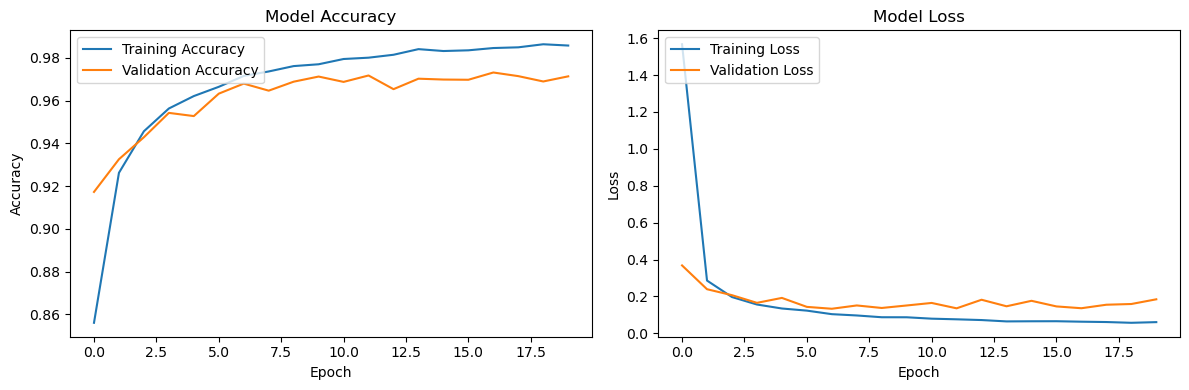

In [5]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by `model.fit`
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Train



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0465 - val_accuracy: 0.9690 - val_loss: 0.2415
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0525 - val_accuracy: 0.9724 - val_loss: 0.1825
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9886 - loss: 0.0453 - val_accuracy: 0.9701 - val_loss: 0.2048
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0490 - val_accuracy: 0.9714 - val_loss: 0.1892
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0460 - val_accuracy: 0.9686 - val_loss: 0.2672
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0495 - val_accuracy: 0.9713 - val_loss: 0.2312
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0489 - val_accuracy: 0.9679 - val_loss: 0.2257
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0510 - 

In [7]:
from PIL import Image

#Image test

image_path = "3.png"
img = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
img = img.resize((28, 28))  # Redimensionner l'image à 28x28 pixels
img_array = np.array(img).reshape(1, -1)  # Aplatir l'image pour qu'elle corresponde aux données d'entrée


# Prediction
predictions = model.predict(img_array)
predictions



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[0.0000000e+00, 4.7011447e-37, 3.5347117e-20, 1.0000000e+00,
        0.0000000e+00, 4.0586935e-20, 0.0000000e+00, 1.5708422e-20,
        3.2654488e-19, 3.9410613e-27]], dtype=float32)

In [8]:
# #Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)

print(f"Accuracy : {test_accuracy * 100:.2f}")
print(f"Lost : {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.3025
Accuracy : 96.96
Lost : 0.2445066124200821
